## Problem 1:
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

The purpose of the report is to create an exit poll for the news channel CNBE that will aid in predicting overall win and seats covered by a particular political party: "Conservative" or "Labour." The classification will be performed using several classification models, which will then be compared.

### Data Dictionary

1. **vote:** Party choice: Conservative or Labour

2. **age:** in years

3. **economic.cond.national:** Assessment of current national economic conditions, 1 to 5.

4. **economic.cond.household:** Assessment of current household economic conditions, 1 to 5.

5. **Blair:** Assessment of the Labour leader, 1 to 5.

6. **Hague:** Assessment of the Conservative leader, 1 to 5.

7. **Europe:** an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. **political.knowledge:** Knowledge of parties' positions on European integration, 0 to 3.

9. **gender:** female or male.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
sns.set(color_codes=True)
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

#### Read and view data

In [2]:
df = pd.read_excel("Election_Data.xlsx")

In [3]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
5,Labour,47,3,4,4,4,4,2,male
6,Labour,57,2,2,4,4,11,2,male
7,Labour,77,3,4,4,1,1,0,male
8,Labour,39,3,3,4,4,11,0,female
9,Labour,70,3,2,5,1,11,2,male


### Data Pre-processing

###### Checking for number of rows and columns:

In [6]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


###### Cheching data type of data features:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


###### Checking for Null and missing values in the dataset :

In [8]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

###### Checking for data types in the dataset :

In [9]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

###### Checking the description of dataset

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


###### Checking the Skewness and Kurtosis:

In [11]:
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [12]:
df.kurt()

age                       -0.946897
economic.cond.national    -0.255994
economic.cond.household   -0.206302
Blair                     -1.065582
Hague                     -1.391743
Europe                    -1.237841
political.knowledge       -1.216646
dtype: float64

###### Changing the data types of ordinal features:

In [13]:
cat=["economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]

In [14]:
for i in cat:
    df[i]=df[i].astype("object")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


###### unique values for categorical variables:

In [16]:
df.vote.value_counts(normalize = True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




###### Making different list for categorical columns and numerical columns:

In [18]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
['age']


###### Describe for numerical and categorical columns:

In [19]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [20]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
economic.cond.national,1525,5,3,607
economic.cond.household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political.knowledge,1525,4,2,782
gender,1525,2,female,812


In [21]:
df.gender.value_counts(normalize = True)*100

female    53.245902
male      46.754098
Name: gender, dtype: float64

In [22]:
df['economic.cond.national'].value_counts(normalize = True)*100

3    39.803279
4    35.540984
2    16.852459
5     5.377049
1     2.426230
Name: economic.cond.national, dtype: float64

In [23]:
df['economic.cond.household'].value_counts(normalize = True)*100

3    42.491803
4    28.852459
2    18.360656
5     6.032787
1     4.262295
Name: economic.cond.household, dtype: float64

In [24]:
df['Blair'].value_counts(normalize = True)*100

4    54.819672
2    28.721311
5    10.032787
1     6.360656
3     0.065574
Name: Blair, dtype: float64

In [25]:
df['Hague'].value_counts(normalize = True)*100

2    40.918033
4    36.590164
1    15.278689
5     4.786885
3     2.426230
Name: Hague, dtype: float64

In [26]:
df['political.knowledge'].value_counts(normalize = True)*100

2    51.278689
0    29.836066
3    16.393443
1     2.491803
Name: political.knowledge, dtype: float64

In [27]:
df['Europe'].value_counts(normalize = True)*100

11    22.163934
6     13.704918
3      8.459016
4      8.327869
5      8.131148
8      7.344262
9      7.278689
1      7.147541
10     6.622951
7      5.639344
2      5.180328
Name: Europe, dtype: float64

###### Checking for duplicates in this dataset :

In [28]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [29]:
df.drop_duplicates(inplace=True)

In [30]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [31]:
df.shape

(1517, 9)

### Observations:

- Dataset has 9 columns and 1525 rows excluding the 'unnamed:0' column.
- The first column "Unnamed: 0" has only serial numbers, so we can drop it as it is not useful.
- There are 9 variables out of which the 'vote' variable is the dependent variable and the rest are independent variables.
- Among the independent variables, except for 'age' variable which is continuous, all the other 7 variables are categorical type.
- Among the categorical independent variables, except for 'gender' all the other are ordinal categorical variables
- Vote will be target variable.
- The dataset is used for predicting which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.
- There are no missing values in the dataset.
- There are 8 Duplicated instances.These are voters with the all the attributes same does not seem to be logical and do not add any value to the study hence we will drop the duplicates so avoid any overlapping.
- Skewness and Kurtosis is also calculated for each column, Data with high skewness indicates lack of symmetry and high value of kurtosis indicates heavily tailed data.
- The target variable 'vote' shows that 69.68% voters are in favor of the 'Labour' Party and 32.32% in favor of 'Conservative' Party.There is a class imbalance noticed from a modelling perspective. We'll look at the classification model outputs to determine whether this has an effect and if any treatment is necessary.
- The percentage of male and female voters are nearly same with 53.26% female and 46.74% male.As a result, all genders appear to be equally represented.
- Most of the voters surveyed assessed the current national economic conditions on average scale with around 75% voters giving a ratings of 3 or 4. Only around 8% of surveyed voters gave extreme ratings of 5 or 1.
- Most of the voters surveyed assessed the current household economic conditions on average scale with around 70% voters giving a ratings of 3 or 4. Only around 10% of surveyed voters gave extreme ratings of 5 or 1.
- The Labour Party Leader 'Blair' received ratings of 4 or above by around 65% of the surveyed voters.
- The Conservative Party Leader 'Hague' received ratings of 4 or below by around 40% of the surveyed voters.
- Around 22% of the surveyed voters highly disregard closer links between Britain and European Union, i.e. they rated the maximum (11) on the 'Eurosceptic' sentiment scale.
- Around 67% of of the surveyed voters are familiar with the viewpoints of the 'Labour' and 'Conservative' parties on European integration. The rest of the of the surveyed voters have no notion or had just a rudimentary understanding of this front.


## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

### Data Visualization:

### Univariate Analysis for Numeric Variable - 'age'

In [32]:
df_num = df.select_dtypes(['float64','int64','int32'])
df_cat = df.select_dtypes(['object'])

In [33]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde= True, bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    
    plt.show()

In [34]:
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

1

Description of age
----------------------------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


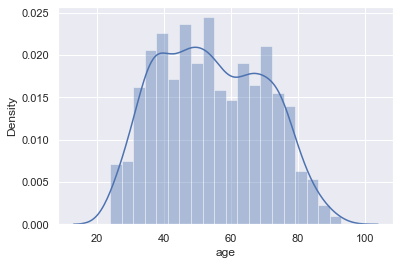

BoxPlot of age
----------------------------------------------------------------------------


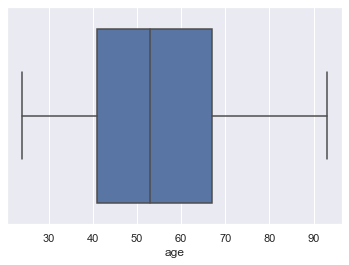

In [35]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

#### Observations:

#### Age    
- From the above graphs, we can infer that mean 'age'of the surveyed voters is around 54yrs with the minimum of 24yrs and maximum of 93yrs.
- The distribution of 'age' is slightly right skewed with skewness vlaue of 0.14462.
- The distribution is almost normally distributed.
- The dist plot shows the distribution of most of data from 25 to 80.
- The box plot of the 'age' variable shows no outliers.

### Univariate Analysis for Cateforical Variables:

In [36]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.xticks(rotation=0)
    plt.show()
    print("       ")

In [37]:
lstcatcolumns = list(df_cat.columns.values)
len(lstcatcolumns)

8

Details of vote
----------------------------------------------------------------
Labour          1057
Conservative     460
Name: vote, dtype: int64


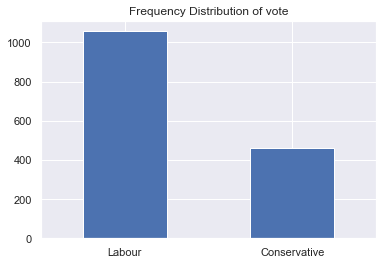

       
Details of economic.cond.national
----------------------------------------------------------------
3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64


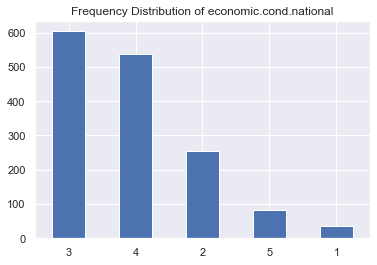

       
Details of economic.cond.household
----------------------------------------------------------------
3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


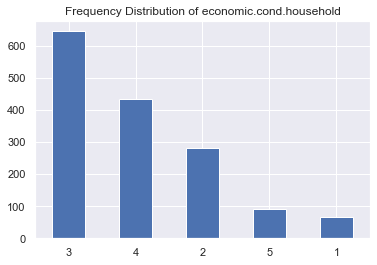

       
Details of Blair
----------------------------------------------------------------
4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64


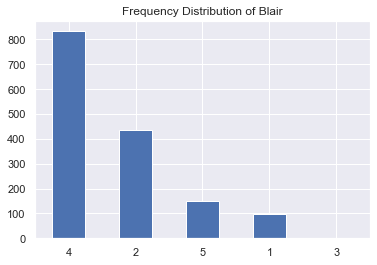

       
Details of Hague
----------------------------------------------------------------
2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64


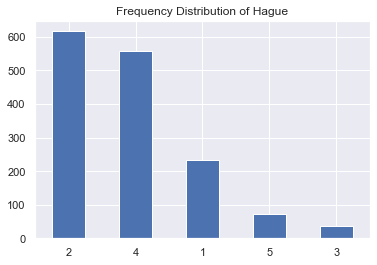

       
Details of Europe
----------------------------------------------------------------
11    338
6     207
3     128
4     126
5     123
8     111
9     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64


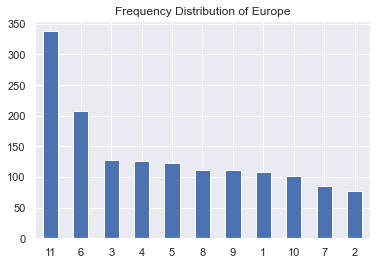

       
Details of political.knowledge
----------------------------------------------------------------
2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64


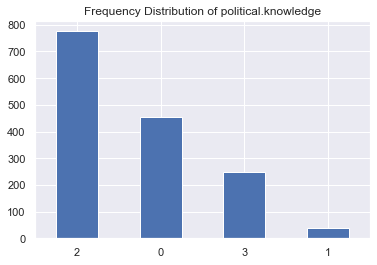

       
Details of gender
----------------------------------------------------------------
female    808
male      709
Name: gender, dtype: int64


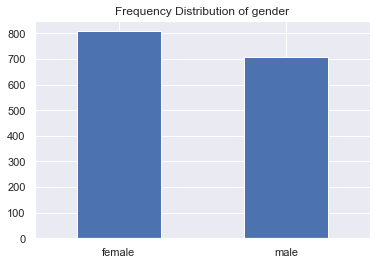

In [38]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

### Observations:

- The target variable 'vote' shows that 69.68% voters are in favor of the 'Labour' Party and 32.32% in favor of 'Conservative' Party
- The conservative party does seem to be lesser favourable party of choice for respondents.
- Most voters rated 3 or above for the national economic condition and economic condition of household.
- For 'Blair' of the Labour Party most surveyed voters gave a rating of 4 and above and for 'Hague' of the Conservative party most voters gave a rating of 2 or below.
- One explanation for this might be because the Labour Party's leader has higher assessment ratings than the Conservative Party's leader. People believe Blair is a superior leader for taking the country ahead.
- Although over 22% of surveyed voters are strongly Eurosceptic, with the rating of 11, the rest of the surveyed voters appear to be evenly spread between low and high Eurosceptic emotions, with just a slightly higher number of voters giving an average rating of 6.
- People are either extremely Eurosceptic or in the centre when it comes to European integration, as shown in the graph above. We may make the assumption that a the party that does not favor the European Integration might be able to get the votes of the people.
-  Respondents either seem to have a fair knowledge(49%) of the parties’ position on the European Integration or no idea at all(30%).
- From 'gender' variable it is observed that male and female are nearly same.

### Bivariate Analysis

### Boxplot of Categorical variable with Vote

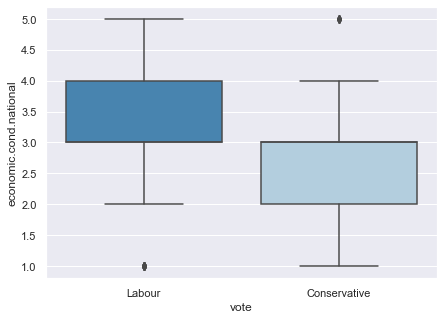

In [39]:
plt.figure(figsize=(7,5))
sns.boxplot(x= df['vote'], y= df['economic.cond.national'], palette='Blues_r');


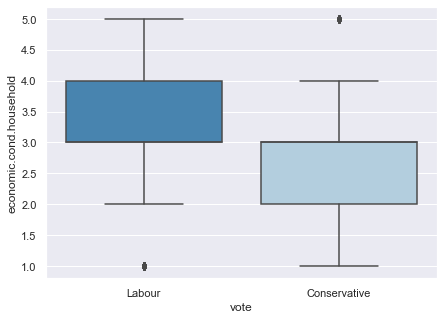

In [40]:
plt.figure(figsize=(7,5))
sns.boxplot(x= df['vote'], y= df['economic.cond.household'], palette='Blues_r');

- **The assessment rating of current national economic conditions and current household economic conditions for Labour party is better than the conservative party.**

- **More than 50% of the voters have rated 3 and 4 to 'Labour' party, while we can see that the 'Conservative' party has most of the ratings of 2 and 3.**

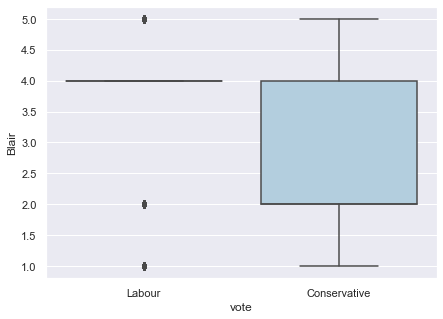

In [41]:
plt.figure(figsize=(7,5))
sns.boxplot(x= df['vote'], y= df['Blair'], palette='Blues_r');

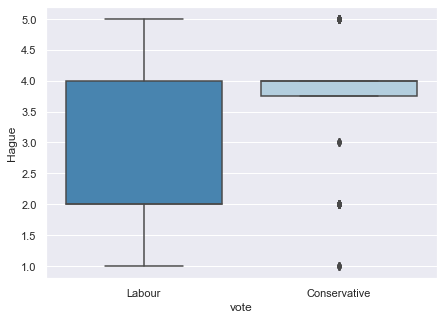

In [42]:
plt.figure(figsize=(7,5))
sns.boxplot(x= df['vote'], y= df['Hague'], palette='Blues_r');

- **The assessment rating of the Labour leader and Conservative leader – Blair and Hague respectively.**
- **For 'Blair' of the Labour Party most respondants gave a rating of 4 and above and for 'Hague' of the Conservative party most respondants gave a rating of 2 or below**.

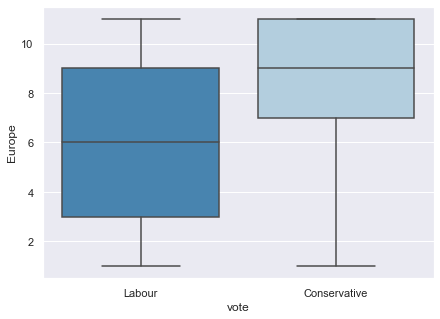

In [43]:
plt.figure(figsize=(7,5))
sns.boxplot(x= df['vote'], y= df['Europe'], palette='Blues_r');

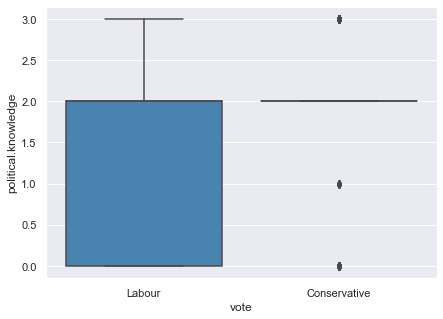

In [44]:
plt.figure(figsize=(7,5))
sns.boxplot(x= df['vote'], y= df['political.knowledge'], palette='Blues_r');

- From the above plot we can see that the 'Conservative party' has high disregard on european union and the median ratings on 'Eurosceptic' sentiment scale is around 9 ,  while the 'Labour party' ratings is 6. 
- An interesting observation to be made here is that respondents with a strong negative attitude towards European Integration are highly likely to vote for Conservative Party and respondents who are likely to vote for Labour Party seem to have evenly distributed attitude towards the Integration.
- People with less Knowledge of parties'positions on European integration and who show less Eurosceptic sentiment are more inclined towards Labour party.
- People with Knowledge of parties'positions on European integration and who show more Eurosceptic sentiment are more inclined towards Conservative party.

In [45]:
gen = pd.crosstab(df['gender'], df['vote'])
gen

vote,Conservative,Labour
gender,,
female,257,551
male,203,506


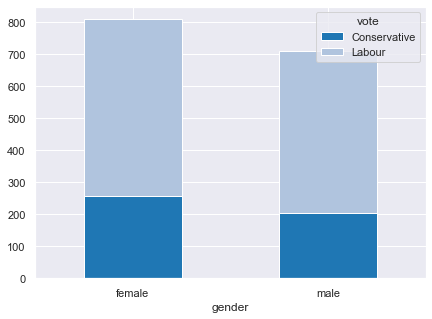

In [46]:
gen.plot.bar( stacked=True,figsize=(7,5), color = ['tab:blue', 'lightsteelblue'])
plt.xticks(rotation=0)
plt.show()

In [47]:
pk = pd.crosstab(df['political.knowledge'], df['vote'])
pk

vote,Conservative,Labour
political.knowledge,,
0,94,360
1,11,27
2,283,493
3,72,177


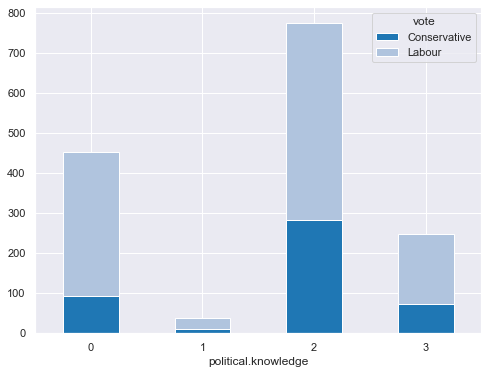

In [48]:
pk.plot.bar(stacked=True,figsize=(8,6), color = ['tab:blue', 'lightsteelblue'])
plt.xticks(rotation=0)
plt.show()

In [49]:
Euro = pd.crosstab(df['Europe'], df['vote'])
Euro

vote,Conservative,Labour
Europe,,
1,5,104
2,6,71
3,14,114
4,18,108
5,20,103
6,35,172
7,32,54
8,48,63
9,56,55


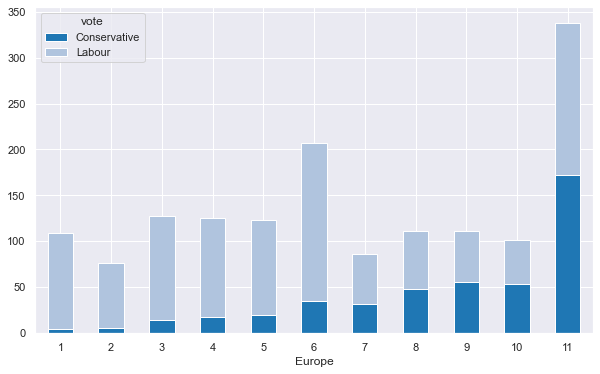

In [50]:
Euro.plot.bar(stacked=True,figsize=(10,6), color = ['tab:blue', 'lightsteelblue'])
plt.xticks(rotation=0)
plt.show()

In [51]:
Hau = pd.crosstab(df['Hague'], df['vote'])
Hau

vote,Conservative,Labour
Hague,,
1,11,222
2,95,522
3,9,28
4,286,271
5,59,14


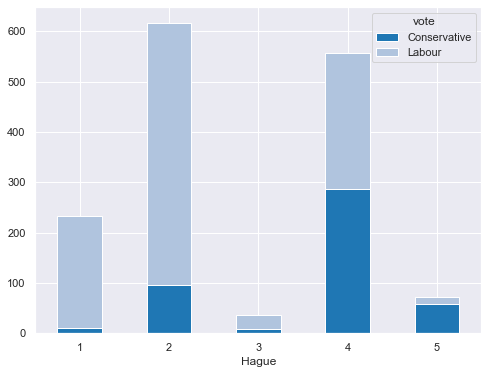

In [52]:
Hau.plot.bar(stacked=True,figsize=(8,6), color = ['tab:blue', 'lightsteelblue'])
plt.xticks(rotation=0)
plt.show()

In [53]:
Blair = pd.crosstab(df['Blair'], df['vote'])
Blair

vote,Conservative,Labour
Blair,,
1,59,38
2,240,194
3,1,0
4,157,676
5,3,149


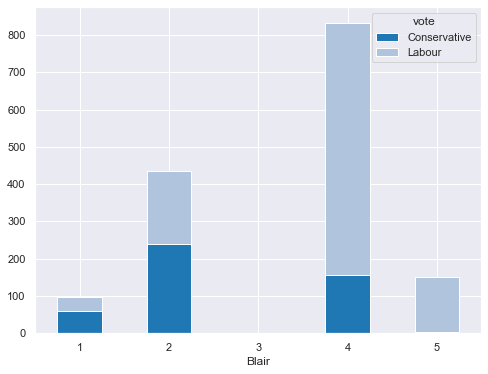

In [54]:
Blair.plot.bar(stacked=True,figsize=(8,6), color = ['tab:blue', 'lightsteelblue'])
plt.xticks(rotation=0)
plt.show()

In [55]:
ech = pd.crosstab(df['economic.cond.household'], df['vote'])
ech

vote,Conservative,Labour
economic.cond.household,,
1,28,37
2,126,154
3,197,448
4,86,349
5,23,69


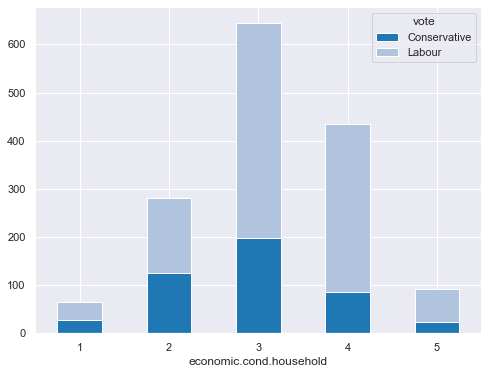

In [56]:
ech.plot.bar(stacked=True,figsize=(8,6), color = ['tab:blue', 'lightsteelblue'])
plt.xticks(rotation=0)
plt.show()

In [57]:
ecn = pd.crosstab(df['economic.cond.national'], df['vote'])
ecn

vote,Conservative,Labour
economic.cond.national,,
1,21,16
2,140,116
3,199,405
4,91,447
5,9,73


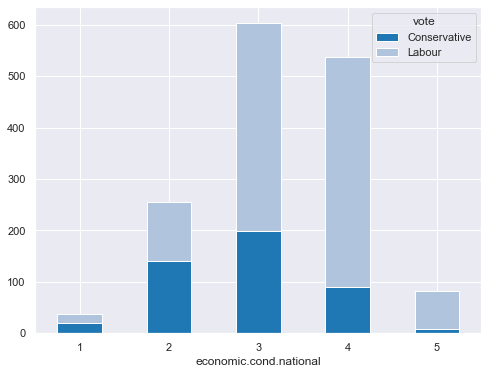

In [58]:
ecn.plot.bar(stacked=True,figsize=(8,6), color = ['tab:blue', 'lightsteelblue'])
plt.xticks(rotation=0)
plt.show()

In [59]:
Epk = pd.crosstab(df['Europe'], df['political.knowledge'])
Epk

political.knowledge,0,1,2,3
Europe,,,,
1,28,3,60,18
2,7,1,43,26
3,29,1,61,37
4,37,3,59,27
5,28,1,61,33
6,71,2,111,23
7,23,5,50,8
8,39,4,52,16
9,43,0,55,13


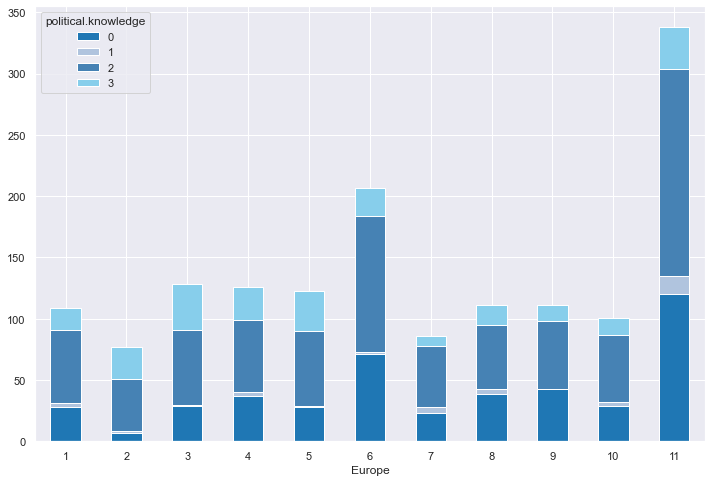

In [60]:
Epk.plot.bar(stacked=True,figsize=(12,8), color = ['tab:blue', 'lightsteelblue', 'steelblue','skyblue'])
plt.xticks(rotation=0)
plt.show()

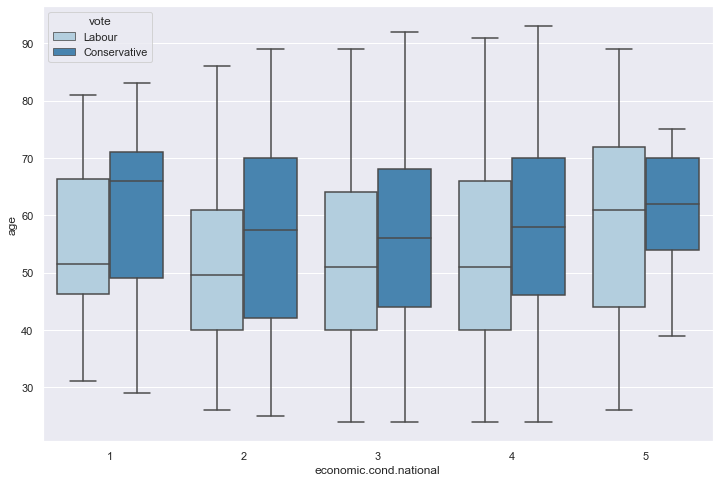

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(x='economic.cond.national', y= 'age', hue = 'vote', data = df, palette='Blues')
plt.show()

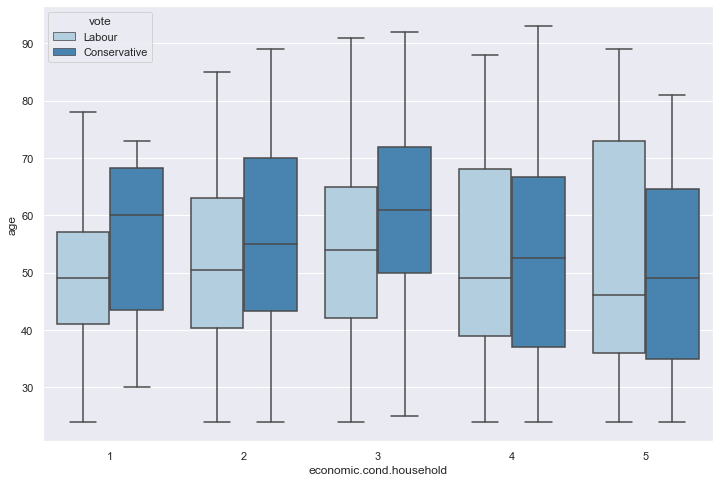

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(x='economic.cond.household', y= 'age', hue = 'vote', data = df, palette='Blues')
plt.show()

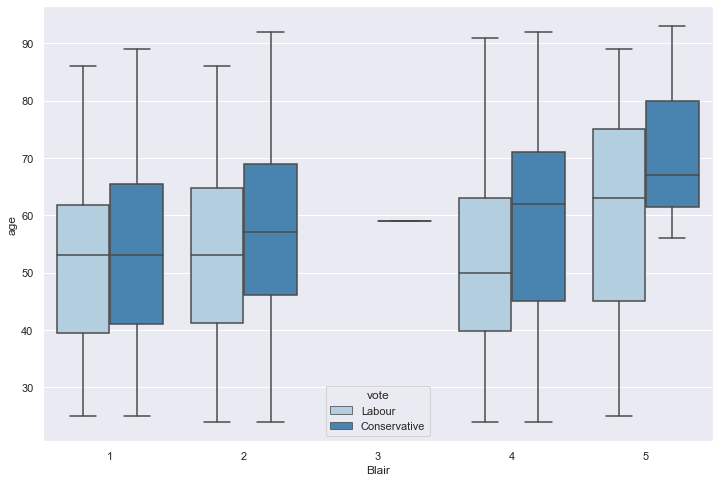

In [63]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Blair', y= 'age', hue = 'vote', data = df, palette='Blues')
plt.show()

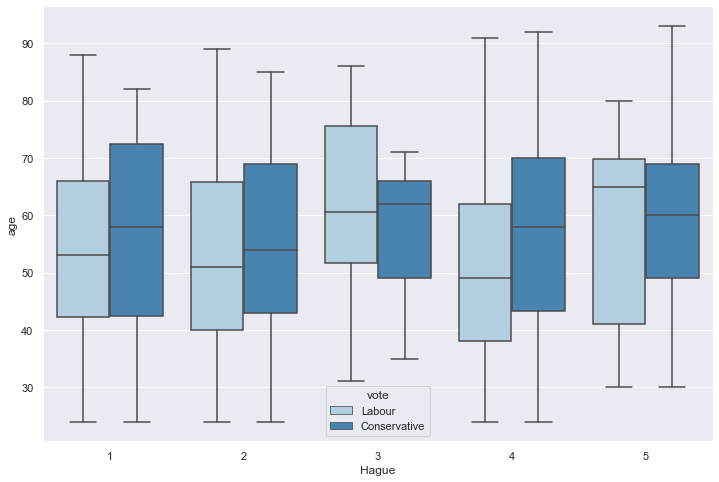

In [64]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Hague', y= 'age', hue = 'vote', data = df, palette='Blues')
plt.show()

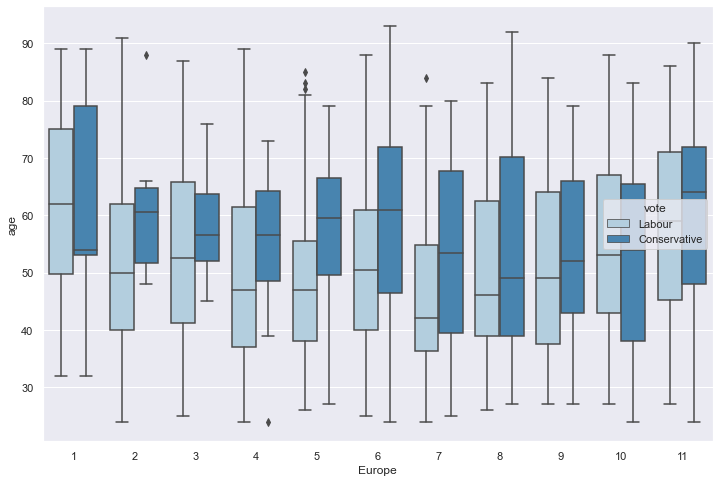

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Europe', y= 'age', hue = 'vote', data = df, palette='Blues')
plt.show()

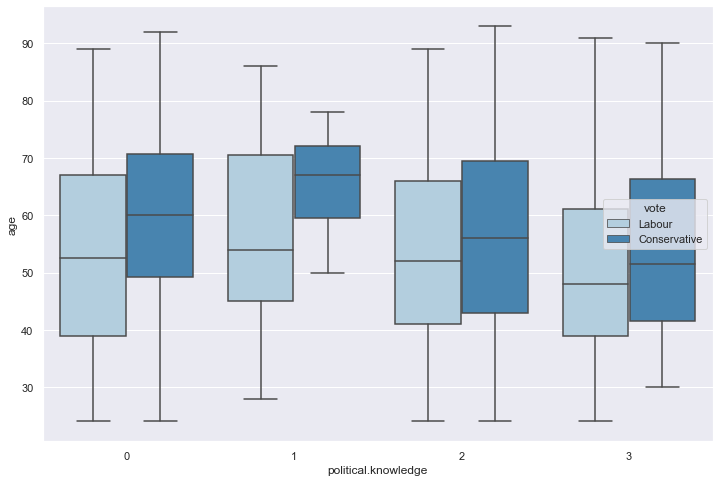

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(x='political.knowledge', y= 'age', hue = 'vote', data = df, palette='Blues')
plt.show()

**The median age of people who voted for conservative party has slightly more people of older age group, than the people voting Labour party.**

**People with more Knowledge of parties positions on European integration and who show more Eurosceptic sentiment mostly belong to the older age group favouring Conservative party**.

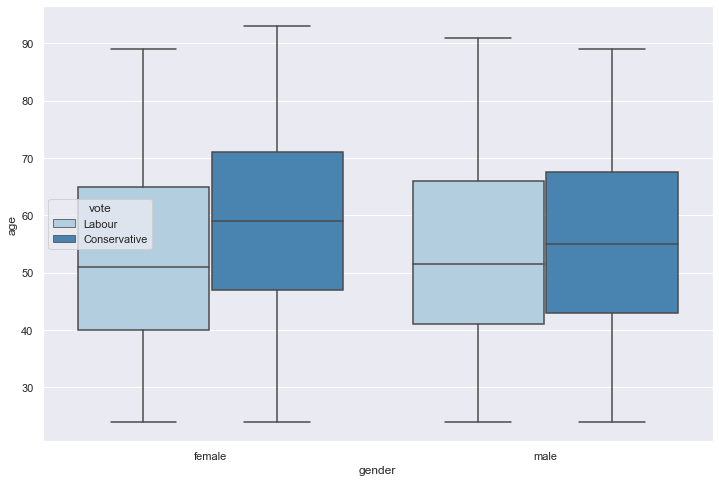

In [67]:
plt.figure(figsize=(12,8))
sns.boxplot(x='gender', y= 'age', hue = 'vote', data = df, palette='Blues')
plt.show()

### Countplot of categorical variables with vote as hue

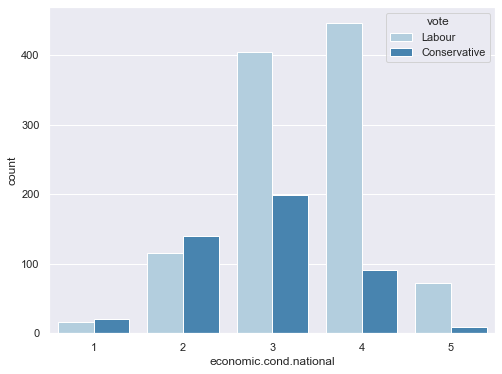

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(x='economic.cond.national', hue = 'vote', data = df, palette='Blues')
plt.show()

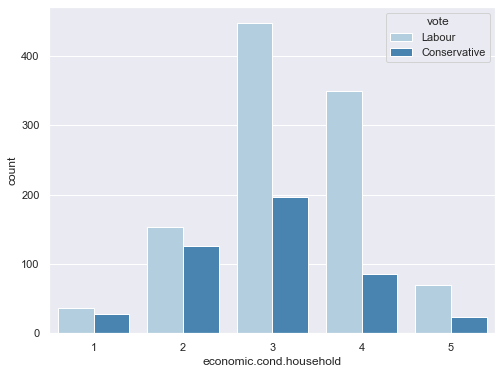

In [69]:
plt.figure(figsize=(8,6))
sns.countplot(x='economic.cond.household', hue = 'vote', data = df, palette='Blues')
plt.show()

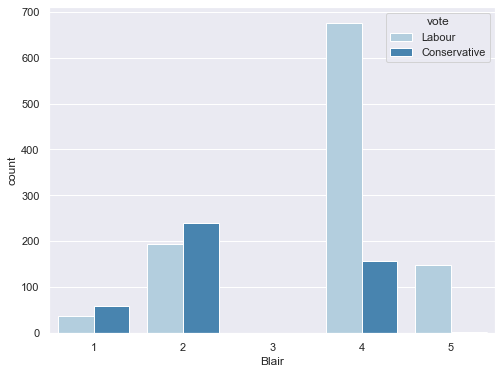

In [70]:
plt.figure(figsize=(8,6))
sns.countplot(x='Blair', hue = 'vote', data = df, palette='Blues')
plt.show()

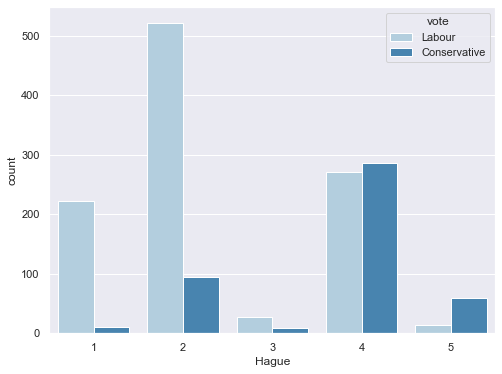

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(x='Hague', hue = 'vote', data = df, palette='Blues')
plt.show()

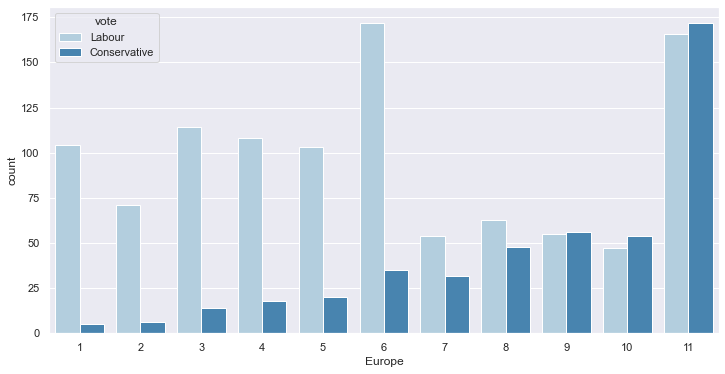

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x='Europe', hue = 'vote', data = df, palette='Blues')
plt.show()

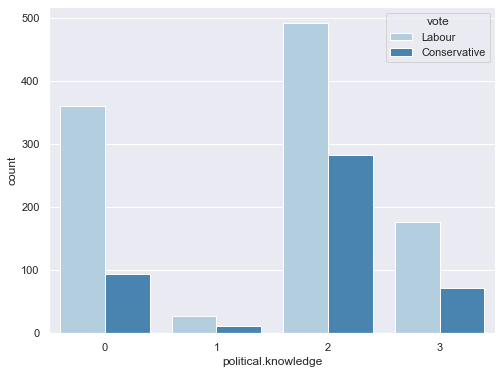

In [73]:
plt.figure(figsize=(8,6))
sns.countplot(x='political.knowledge', hue = 'vote', data = df, palette='Blues')
plt.show()

In [74]:
df['economic.cond.national']= df['economic.cond.national'].astype(int)
df['economic.cond.household']= df['economic.cond.household'].astype(int)
df['Blair']= df['Blair'].astype(int)
df['Hague']= df['Hague'].astype(int)
df['Europe']= df['Europe'].astype(int)
df['political.knowledge']= df['political.knowledge'].astype(int)

In [75]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int32
economic.cond.household     int32
Blair                       int32
Hague                       int32
Europe                      int32
political.knowledge         int32
gender                     object
dtype: object

### Pairplot

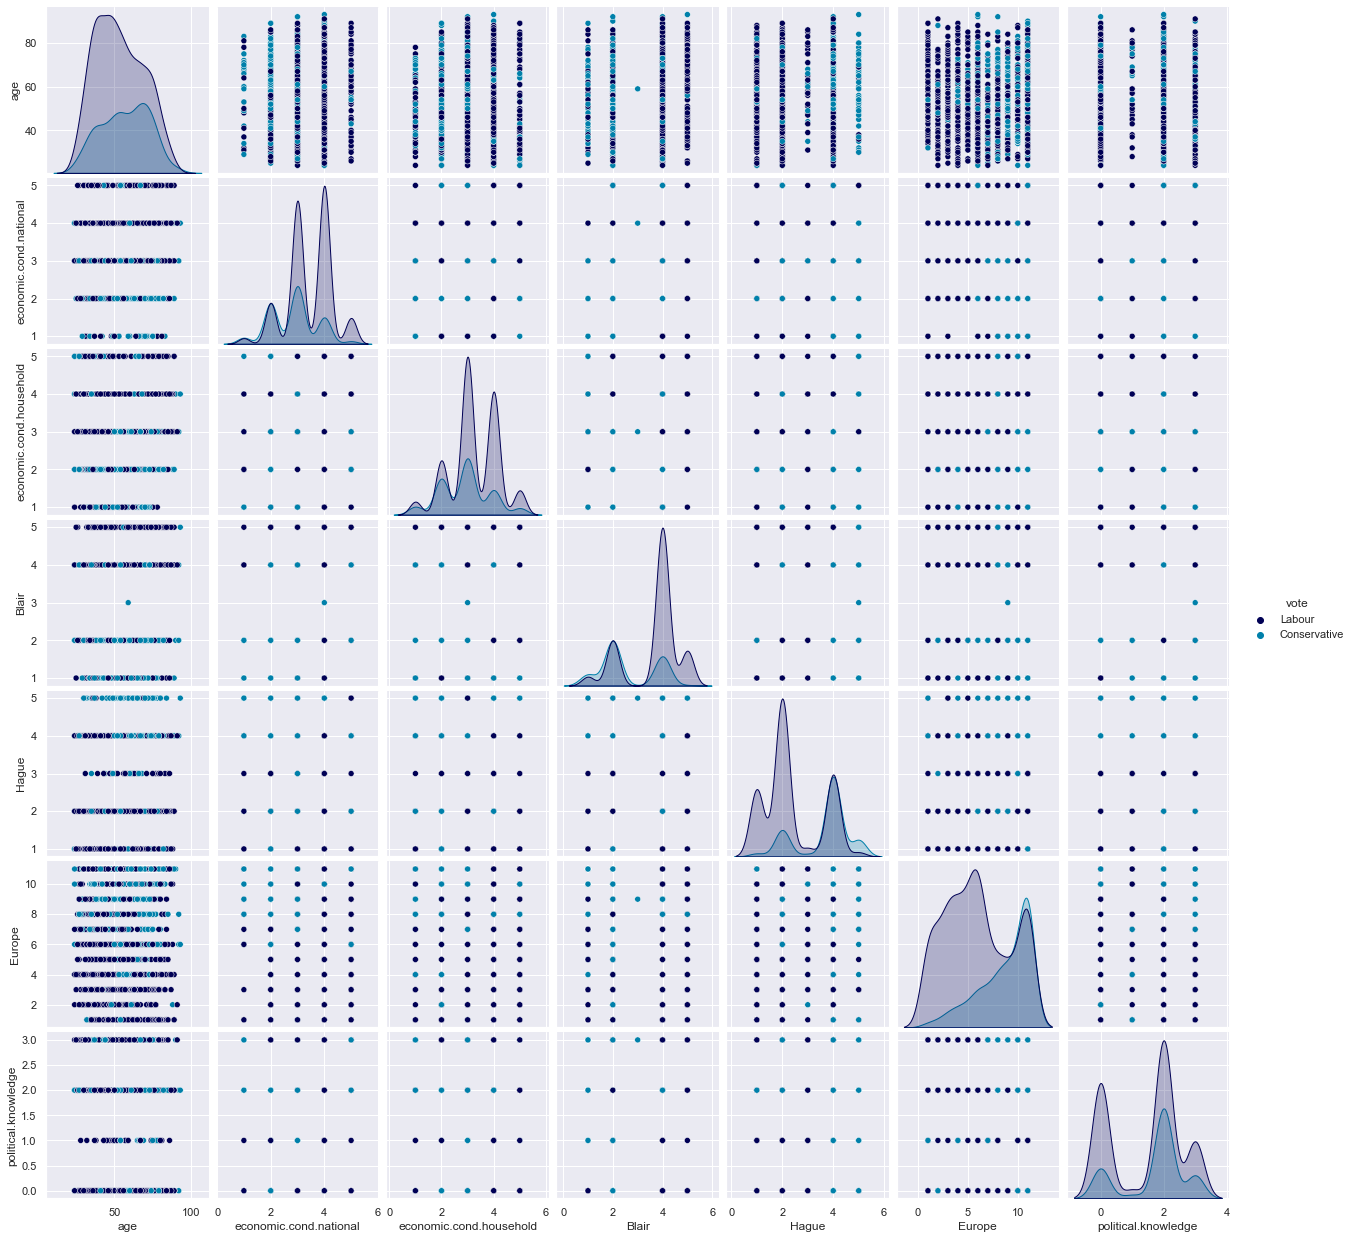

In [76]:
sns.pairplot(df ,diag_kind='kde',hue='vote',palette='ocean');

### Heatmap

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero indicate that there is no linear trend between the two variables. Closer to 1 the correlation is, more positively correlated are the variables that is as one increases so does the other. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases

In [77]:
corr = df.corr()
corr

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


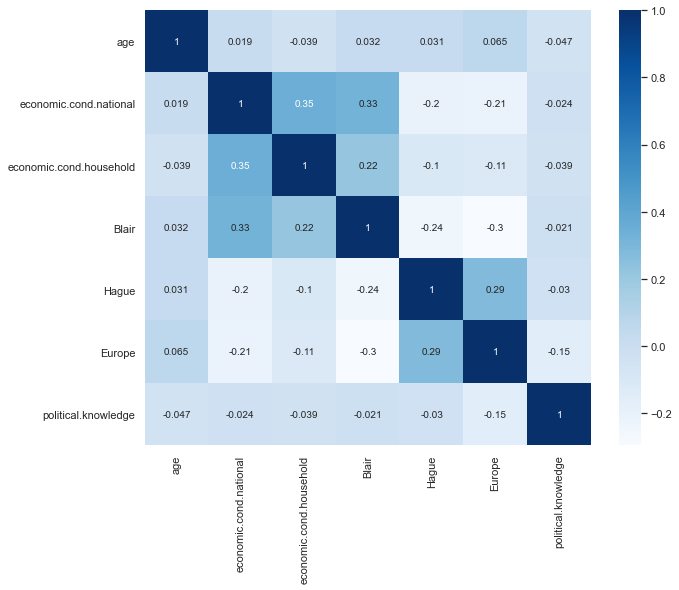

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='Blues');
plt.show()

### Outlier Checks

#### Visualizing Box plot 

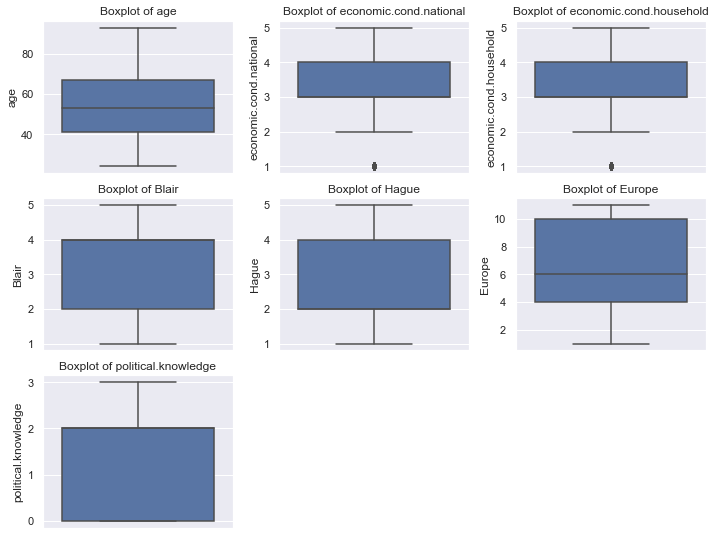

In [79]:
df_num = df.select_dtypes(['float64','int64','int32'])
plt.figure(figsize = (10,10))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4,3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Outliers are present in economic condition household and national other than that none of the variables have any outliers, Since  ‘Economic Condition Household’ and ‘Economic condition National’ are of ordinal type, i.e. they follow a certain order or degree of magnitude and the outliers are treated only for continuous variables and not the ordinal categorical variables.

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [80]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


**One hot encoding:**
One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. One hot encoding is a crucial part of feature engineering for machine learning.

In [81]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

### Checking the head of Dataset after encoding the Categorical variables

In [82]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [83]:
df.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [84]:
df.vote.value_counts(normalize = True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

In [85]:
df.gender.value_counts()

0    808
1    709
Name: gender, dtype: int64

In [86]:
df.gender.value_counts(normalize = True)

0    0.53263
1    0.46737
Name: gender, dtype: float64

**We can see that the class 1 being Labour and class 0 being the conservative party have votes of 1057 and 460 respectively which is approximately in 70% and 30%.**


####  Is Scaling necessary here or not?

Linear Discriminant Analysis (LDA) finds it's coefficients using the variation between the classes (check this), so the scaling doesn't matter either

Hence, Scaling is not required while modelling trees. Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect

KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes

Role of Scaling is mostly important in algorithms that are distance based and require Euclidean Distance. Random Forest is a tree-based model and hence does not require feature scaling . This algorithm requires partitioning, even if you apply Normalization then also> the result would be the same.

**Scaling:**
In general, algorithms that exploit distances or similarities (e.g. in the form of scalar product) between data samples are sensitive to feature transformations i.e. Feature Scaling is performed when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points.

- **The Machine Learning algorithms that require the feature scaling are mostly KNN (K-Nearest Neighbours), Neural Networks, Linear Regression, and Logistic Regression**.
- **The machine learning algorithms that do not require feature scaling is mostly non-linear ML algorithms such as Decision trees, Random Forest, AdaBoost, Naïve Bayes, etc**

Here, we are building a model, to predict which party a voter will vote for on the basis of the given information and to create an exit poll that will help in predicting overall win and seats covered by a particular party.In order to do our analysis we are expected to build model using Logistic Regression, LDA, KNN Model and Naïve Bayes Model.For now we are not scaling the data and will do the scaling based on the models we will run ahead.Hence, as mentioned scaling might be necessary for two models and might not be necessary for the other two.

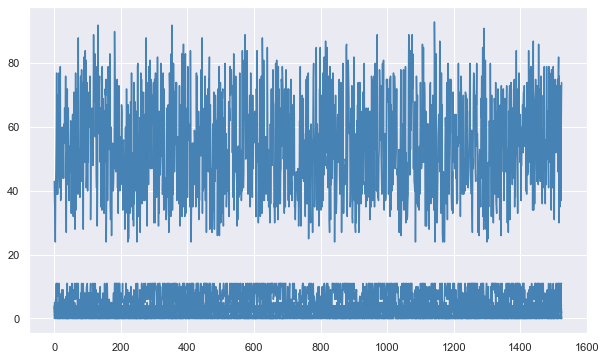

In [87]:
# prior to scaling 
plt.figure(figsize=(10,6))
plt.plot(df, color='steelblue')
plt.show()

In [88]:
df1 = pd.concat([X1, y1])

NameError: name 'X1' is not defined

In [ ]:
# prior to scaling 
plt.figure(figsize=(10,6))
plt.plot(df1, color='steelblue')
plt.show()

#### Capture the target column into separate vectors for training set and test set

In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df['vote']

In [ ]:
X.head()

#### Splitting data into training and test set (70:30)

In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.


## 1- Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#### Fit the Logistic Regression model

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

#### Predicting on Training and Test dataset

In [ ]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

#### Getting the Predicted Classes and Probs

In [ ]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

### Model Evaluation for Train

In [ ]:
# Accuracy - Training Data
model.score(X_train, y_train)

**AUC and ROC for the training data**

In [ ]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

**Confusion Matrix for the training data**

In [ ]:
confusion_matrix(y_train, ytrain_predict)

In [ ]:
sns.heatmap(confusion_matrix(y_train,model.predict(X_train)),annot=True, fmt='d', cbar=False,cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train')
plt.show()

**Classification report for train data**

In [ ]:
print(classification_report(y_train, ytrain_predict))

### Model Evaluation for Test

In [ ]:
# Accuracy - Test Data
model.score(X_test, y_test)

**AUC and ROC for the test data**

In [ ]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Confusion Matrix for the testing data**

In [ ]:
confusion_matrix(y_test, ytest_predict)

In [ ]:
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True, fmt='d', cbar=False,cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test')
plt.show()

**Classification Report for test data**

In [ ]:
print(classification_report(y_test, ytest_predict))

## 1- Applying GridSearchCV for Logistic Regression

In [ ]:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['liblinear','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001],
      'max_iter': [10000, 5000,15000]}

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, n_jobs=2, scoring='f1')

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

In [ ]:
best_model_lr = grid_search.best_estimator_

In [ ]:
# Prediction on the training set

ytrain_predict_lr = best_model_lr.predict(X_train)
ytest_predict_lr = best_model_lr.predict(X_test)

In [ ]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

#### Model evaluation for Train data

In [ ]:
best_model_lr.score(X_train, y_train)

In [ ]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,best_model_lr.predict(X_train))
sns.heatmap(confusion_matrix(y_train,best_model_lr.predict(X_train)),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_train, ytrain_predict_lr),'\n');

In [ ]:
# predict probabilities
probs = best_model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### Model evaluation for Test data

In [ ]:
best_model_lr.score(X_test, y_test)

In [ ]:
# Get the confusion matrix on the train data
confusion_matrix(y_test,best_model_lr.predict(X_test))
sns.heatmap(confusion_matrix(y_test,best_model_lr.predict(X_test)),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, ytest_predict_lr),'\n');

In [ ]:
# predict probabilities
probs = best_model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color = 'green')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_model_lr.coef_[0][idx]))

## 2- Linear Discriminant Analysis Model:


Linear Discriminant Analysis uses linear combination of independent variables to predict the class in the response variable of a given observation. The prediction is made simply by the use of Bayes’ Theorem which estimated the probability of the output class given the input. It also makes use of the probability of each class and also the data belonging to the class. The class which has the highest probability is considered as the output class and the model makes the prediction. The LDA model is built using the sklearn.discriminant_analysis package and then fit in the training data. Using this fitted model, the predictions are made on the testing data. 

LDA works when the measurements made on independent variables for each observation are continuous quantities. When dealing with categorical independent variables, the equivalent technique is discriminant correspondence analysis. On the train data set, we fit our Linear Discriminant model. By default, LDA uses a custom cut-off probability of 0.5. So, initially, we'll create our LDA model with a cut-off probability of 0.5 and see how it performs, then we'll see how it performs with multiple cut-off probabilities to see which one performs the best.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

**Fit the Linear Discriminant Analysis model**

In [ ]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train,y_train)

**Predicting on Training and Test dataset**

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model_lda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model_lda.predict(X_test)

**Training Data and Test Data Confusion Matrix Comparison**

In [ ]:
confusion_matrix(y_train,pred_class_train)
sns.heatmap(confusion_matrix(y_train,pred_class_train),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
confusion_matrix(y_test,pred_class_test)
sns.heatmap(confusion_matrix(y_test,pred_class_test),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**Training and testing classification reports**

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

**AUC and ROC for the training and testing data**

In [ ]:
# predict probabilities
probs = model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
# predict probabilities
probs = model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color = 'red')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 2- Applying GridSearchCV for LDA

In [ ]:
grid_lda ={'solver' :['svd', 'lsqr', 'eigen']}

In [ ]:
grid_search_lda = GridSearchCV(estimator = model_lda, param_grid = grid_lda, cv = cv, n_jobs=-1, scoring='f1')

In [ ]:
grid_search_lda.fit(X_train, y_train)

In [ ]:
best_model_lda = grid_search_lda.best_estimator_

In [ ]:
# Prediction on the training set

ytrain_predict_lda = best_model_lda.predict(X_train)
ytest_predict_lda= best_model_lda.predict(X_test)

In [ ]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

#### Model evaluation for Train data

In [ ]:
best_model_lda.score(X_train, y_train)

In [ ]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,best_model_lda.predict(X_train))
sns.heatmap(confusion_matrix(y_train,best_model_lda.predict(X_train)),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_train, ytrain_predict_lda),'\n');

In [ ]:
# predict probabilities
probs = best_model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### Model evaluation for Test data

In [ ]:
best_model_lda.score(X_test, y_test)

In [ ]:
# Get the confusion matrix on the train data
confusion_matrix(y_test,best_model_lda.predict(X_test))
sns.heatmap(confusion_matrix(y_test,best_model_lda.predict(X_test)),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, ytest_predict_lda),'\n');

In [ ]:
# predict probabilities
probs = best_model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color = 'red')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### change the cut-off values for maximum recall

In [ ]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [ ]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Recall Score',round(metrics.recall_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    print('Precision',round(metrics.precision_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g',cmap='Blues_r'),'\n\n'
    plt.show();

In [ ]:
#Predicting the classes on the train data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_train[:,1])):
    if np.array(pred_prob_train[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [ ]:
#Predicting the classes on the test data

data_pred_custom_cutoff_t=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff_t.append(a)

#### Model evaluation for Train data

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(y_train,data_pred_custom_cutoff),'\n')

#### Model evaluation for Test data

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff_t)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff_t),'\n')

## 3- Naïve Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

**Performance Matrix on train data set**

In [ ]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,NB_model.predict(X_train))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs =NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

**Performance Matrix on test data set**

In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

In [ ]:
# Get the confusion matrix on the test data
sns.heatmap((metrics.confusion_matrix(y_test,NB_model.predict(X_test))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_model_lda.coef_[0][idx]))

### Naive Bayes with SMOTE
##### SMOTE is only applied on the train data set

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
X_train_res.shape

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train_res,NB_SM_model.predict(X_train_res))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs =NB_SM_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
# Get the confusion matrix on the test data
sns.heatmap((metrics.confusion_matrix(y_test,NB_SM_model.predict(X_test))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs = NB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 4- KNN Model

In [ ]:
df1 = df.copy()

#### Capture the target column into separate vectors for training set and test set

In [ ]:
# Copy all the predictor variables into X dataframe
X_k = df1.drop('vote', axis=1)

# Copy target into the y dataframe. 
y1 = df1['vote']

In [ ]:
from scipy.stats import zscore
X1 =X_k.apply(zscore)

In [ ]:
X1.head(10)

#### Splitting data into training and test set (70:30)

In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X1, y1, test_size=0.30 , random_state=1)

In [ ]:
print('X_train',X_train_k.shape)
print('X_test',X_test_k.shape)
print('y_train',y_train_k.shape)
print('y_test',y_test_k.shape)

**Fit the KNN model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_k,y_train_k)

**Performance Matrix on train data set**

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train_k)
model_score = KNN_model.score(X_train_k, y_train_k)
print(model_score)
print(metrics.confusion_matrix(y_train_k, y_train_predict))
print(metrics.classification_report(y_train_k, y_train_predict))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train_k,KNN_model.predict(X_train_k))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs = KNN_model.predict_proba(X_train_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_k, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

**Performance Matrix on test data set**

In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test_k)
model_score = KNN_model.score(X_test_k, y_test_k)
print(model_score)
print(metrics.confusion_matrix(y_test_k, y_test_predict))
print(metrics.classification_report(y_test_k, y_test_predict))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_test_k,KNN_model.predict(X_test_k))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs = KNN_model.predict_proba(X_test_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_k, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Running a loop for K= 1 to 19 odd numbers and find MSE**

**Lessser the MSE greater the performance**

Run the KNN with no of neighbours to be 1,3,5..19 and Find the optimal number of neighbours from *K=1,3,5,7....19** using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_k, y_train_k)
    # evaluate test accuracy
    scores = knn.score(X_test_k, y_test_k)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE


#### Plot misclassification error vs k (with k value on X-axis) using matplotli

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model_1=KNeighborsClassifier(n_neighbors= 11)
KNN_model_1.fit(X_train_k,y_train_k)

### Performance Matrix on train data set

In [ ]:
## Performance Matrix on train data set
y_train_predict_1 = KNN_model_1.predict(X_train_k)
model_score = KNN_model_1.score(X_train_k, y_train_k)
print(model_score)
print(metrics.confusion_matrix(y_train_k, y_train_predict_1))
print(metrics.classification_report(y_train_k, y_train_predict_1))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train_k,KNN_model_1.predict(X_train_k))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs = KNN_model_1.predict_proba(X_train_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_k, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Performance Matrix on test data set

In [ ]:
## Performance Matrix on test data set
y_test_predict_1 = KNN_model_1.predict(X_test_k)
model_score = KNN_model_1.score(X_test_k, y_test_k)
print(model_score)
print(metrics.confusion_matrix(y_test_k, y_test_predict_1))
print(metrics.classification_report(y_test_k, y_test_predict_1))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_test_k,KNN_model_1.predict(X_test_k))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs = KNN_model_1.predict_proba(X_test_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_k, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. 

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

Bagging_model=BaggingClassifier(base_estimator= RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

####  Performance Matrix on train data set

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,Bagging_model.predict(X_train))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### Performance Matrix on test data set

In [ ]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_test,Bagging_model.predict(X_test))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Boosting

### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

#### Performance Matrix on train data set

In [ ]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,ADB_model.predict(X_train))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs =ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### Performance Matrix on test data set

In [ ]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_test,ADB_model.predict(X_test))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl_sc = GradientBoostingClassifier(random_state=1)
gbcl_sc = gbcl_sc.fit(X_train_k, y_train_k)

### Model performance for train data

In [ ]:
## Performance Matrix on train data set
y_train_predict_sc = gbcl_sc.predict(X_train_k)
model_score = gbcl_sc.score(X_train_k, y_train_k)
print(model_score)
print(metrics.confusion_matrix(y_train_k, y_train_predict_sc))
print(metrics.classification_report(y_train_k, y_train_predict_sc))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train_k,gbcl_sc.predict(X_train_k))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix fot train')
plt.show()

In [ ]:
# predict probabilities
probs =gbcl_sc.predict_proba(X_train_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_k, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Model performance for Test

In [ ]:
## Performance Matrix on test data set
y_test_predict_sc = gbcl_sc.predict(X_test_k)
model_score = gbcl_sc.score(X_test_k, y_test_k)
print(model_score)
print(metrics.confusion_matrix(y_test_k, y_test_predict_sc))
print(metrics.classification_report(y_test_k, y_test_predict_sc))

In [ ]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_test_k,gbcl_sc.predict(X_test_k))),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix fot train')
plt.show()

In [ ]:
# predict probabilities
probs =gbcl_sc.predict_proba(X_test_k)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_k, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test_k, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.



In [ ]:
## The performance matrix of each model is done in the above following to respective models

## Problem 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

In [ ]:
## Importing the necessary libraries along with the standard import

import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import string # this is used for string manipulations
nltk.download('inaugural')
from nltk.corpus import inaugural

In [ ]:
inaugural.fileids()

## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

### Number of characters

In [ ]:
Roosevelt = inaugural.raw('1941-Roosevelt.txt')

Kennedy = inaugural.raw('1961-Kennedy.txt')

Nixon = inaugural.raw('1973-Nixon.txt')

In [ ]:
number_of_characters = len(Roosevelt)

print('Number of characters in Roosevelt file :', number_of_characters)

In [ ]:
number_of_characters = len(Kennedy)

print('Number of characters in Kennedy file :', number_of_characters)

In [ ]:
number_of_characters = len(Nixon)

print('Number of characters in Nixon file :', number_of_characters)

### Number of Words

In [ ]:
R_number_of_words = list(inaugural.words('1941-Roosevelt.txt'))

print('Number of words in Roosevelt file :', len(R_number_of_words))

In [ ]:
K_number_of_words = list(inaugural.words('1961-Kennedy.txt'))

print('Number of words in Kennedy file :', len(K_number_of_words))

In [ ]:
N_number_of_words = list(inaugural.words('1973-Nixon.txt'))

print('Number of words in Nixon file :', len(N_number_of_words))

- President Franklin D. Roosevelt’s speech have **7571 Characters** (including spaces) and **1536 words**.
- President John F. Kennedy’s Speech have **7618 Characters** (including spaces) and **1546 words**.
- President Richard Nixon’s Speech have **9991 Characters** (including spaces) and **2028 words**

### Number of sentences

In [ ]:
number_of_sentences = list(inaugural.sents('1941-Roosevelt.txt'))

print('Number of sentence in Roosevelt file :', len(number_of_sentences))

In [ ]:
number_of_sentences = list(inaugural.sents('1961-Kennedy.txt'))

print('Number of sentence in Kennedy file :', len(number_of_sentences))

In [ ]:
number_of_sentences = list(inaugural.sents('1973-Nixon.txt'))

print('Number of sentence in Nixon file :', len(number_of_sentences))

- President Franklin D. Roosevelt’s speech have **68 sentences**
- President John F. Kennedy’s Speech have **52 sentences**
- President Richard Nixon’s Speech have **69 sentences**

## 2.2 Remove all the stopwords from all three speeches. 

### Remove all the stopwords from the Roosevelt speeches.

In [ ]:
### Checking all the words in the speech brfore removing the stop words

print(R_number_of_words)

In [ ]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
extra = ['--']
stopwords.extend(extra)

In [ ]:
# Converting all the words to lower casse
Roosevelt_words =  (x.lower() for x in R_number_of_words) 

# Only keeping the words which are not the 'stopwords'
Roosevelt_words_clean = [word for word in Roosevelt_words if word not in stopwords]

print(len(Roosevelt_words_clean))

print(Roosevelt_words_clean)

### Remove all the stopwords from the Kennedy speeches.

In [ ]:
### Checking all the words in the speech brfore removing the stop words

print(K_number_of_words)

In [ ]:
# Converting all the words to lower casse
Kennedy_words =  (x.lower() for x in K_number_of_words) 

# Only keeping the words which are not the 'stopwords'
Kennedy_words_clean = [word for word in Kennedy_words if word not in stopwords]

print(len(Kennedy_words_clean))

print(Kennedy_words_clean)

### Remove all the stopwords from the Nixon speeches.

In [ ]:
### Checking all the words in the speech brfore removing the stop words

print(N_number_of_words)

In [ ]:
# Converting all the words to lower casse
Nixon_words =  (x.lower() for x in N_number_of_words) 

# Only keeping the words which are not the 'stopwords'
Nixon_words_clean = [word for word in Nixon_words if word not in stopwords]

print(len(Nixon_words_clean))

print(Nixon_words_clean)

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [ ]:
# Extracting the  most common 3 words after the list of words have been converted to lowercase and the stopwords 

In [ ]:
## For President Franklin D. Roosevelt in 1941
nltk.FreqDist(Roosevelt_words_clean).most_common(3)

In [ ]:
## For President John F. Kennedy in 1961
nltk.FreqDist(Kennedy_words_clean).most_common(3)

In [ ]:
## For President Richard Nixon in 1973
nltk.FreqDist(Nixon_words_clean).most_common(3)

## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

In [ ]:
!pip install wordcloud

### Word Cloud for Roosevelt

In [ ]:
wc_r = ' '.join(Roosevelt_words_clean)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_r) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Franklin D. Roosevelt’s speech (after cleaning)!!")
plt.show()

### Word Cloud for Kennedy

In [ ]:
wc_k = ' '.join(Kennedy_words_clean)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_k) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President John F. Kennedy's speech (after cleaning)!!")
plt.show()

### Word Cloud for Nixon   

In [ ]:
wc_n = ' '.join(Nixon_words_clean)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_n) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Richard Nixon's speech (after cleaning)!!")
plt.show()

## Thank you